# Image Compression Using K-Means

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import warnings
warnings.filterwarnings("ignore")

def readImage(img):
    img=io.imread(img)[:, :, :3]
    img = img_as_float(img)
    imgDimensions = img.shape
    imgVectors = img.reshape(-1, img.shape[-1])
    return imgVectors,imgDimensions

def kMeans(imgVectors, K):
    clusterProto = np.random.rand(K, 3)
    labels = np.full((imgVectors.shape[0],), -1)
    labelledPts = [None for k_i in range(K)]
    for idxRGB, RGB in enumerate(imgVectors):
        rowRGB = np.repeat(RGB, K).reshape(3, K).T
        closestLabel = np.argmin(np.linalg.norm(rowRGB - clusterProto, axis=1))
        labels[idxRGB] = closestLabel
        if (labelledPts[closestLabel] is None):
            labelledPts[closestLabel] = []
        labelledPts[closestLabel].append(RGB)     
    for k in range(K):
        if (labelledPts[k] is not None):
            clusterProtNew = np.asarray(labelledPts[k]).sum(axis=0) / len(labelledPts[k])
            clusterProto[k] = clusterProtNew
    return (labels, clusterProto)


if __name__ == '__main__':
    for K in [2, 5, 10, 15, 20]:
        for idx,img in enumerate(['Koala.jpeg','Penguins.jpeg']):
            print(f"Compressing {img} with {K} clusters")
            imgVectors,imgDimensions=readImage(img)
            labels, centriods = kMeans(imgVectors,K=K)
            compImage = np.zeros(imgVectors.shape)
            for i in range(compImage.shape[0]):
                compImage[i] = centriods[labels[i]]
            compImage = compImage.reshape(imgDimensions)
            io.imsave('img_'+str(idx)+'_with_'+str(K)+'_clusters'+'.jpeg', compImage)

Compressing Koala.jpeg with 2 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Penguins.jpeg with 2 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Koala.jpeg with 5 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Penguins.jpeg with 5 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Koala.jpeg with 10 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Penguins.jpeg with 10 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Koala.jpeg with 15 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Penguins.jpeg with 15 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Koala.jpeg with 20 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Compressing Penguins.jpeg with 20 clusters


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


# K-Means Cluster Using Sklearn

In [5]:
from matplotlib import pyplot as io 
from sklearn.cluster import KMeans
from PIL import Image

In [9]:
def readImage(img):
    ##Reading Image
    img1 = io.imread(img) #image is saved as rows * columns * 3 array 
    r1 = img1.shape[0]
    c1 = img1.shape[1]
    img1 = img1.reshape(r1*c1, 3)
    return img1,r1,c1


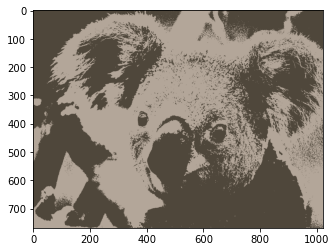

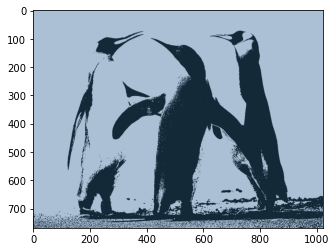

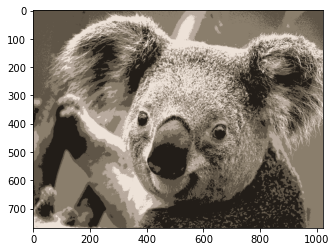

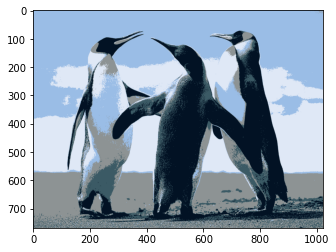

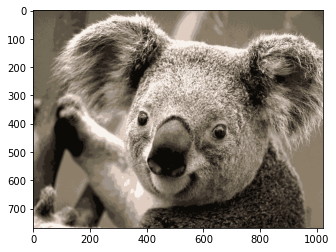

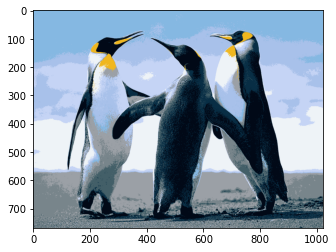

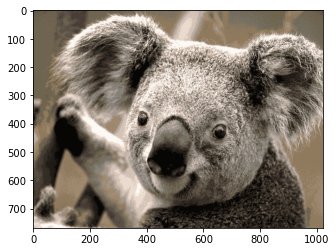

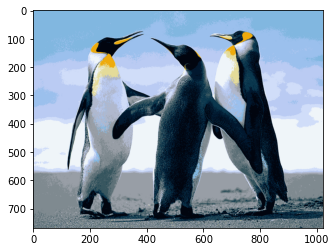

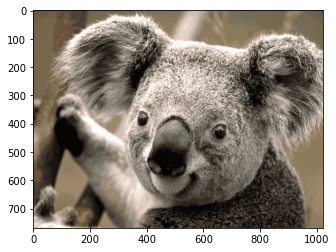

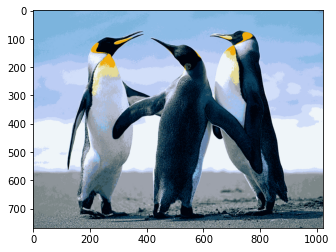

In [10]:
for k in [2, 5, 10, 15, 20]:
    for i,img in enumerate(['Koala.jpeg','Penguins.jpeg']):
        img,rows,cols=readImage(img)
        kMeans=KMeans(n_clusters=k)
        kMeans.fit(img)
        compImage=kMeans.cluster_centers_[kMeans.labels_]
        compImage = np.clip(compImage.astype('uint8'), 0, 255)
        compImage= compImage.reshape(rows, cols, 3)
        io.imsave('img_'+str(i)+'_'+str(k)+'.jpeg', compImage)
        io.imshow(compImage)
        io.show()  